# Task 2 credit card froud detection 
 

# Importing necessary dependencies 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score

# loading the data set 


In [4]:
data_train=pd.read_csv(r"C:\Users\sonam\OneDrive\Desktop\Codsoft\CREDIT_CARD_FRAUD_Detection\Data\fraudTrain.csv")
data_test=pd.read_csv(r"C:\Users\sonam\OneDrive\Desktop\Codsoft\CREDIT_CARD_FRAUD_Detection\Data\fraudTest.csv")


In [5]:
data_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
data_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# EDA and visualation of data set 

In [7]:
#lets merge train and test data 
data=pd.concat([data_train, data_test])

In [8]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [9]:
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud               i

In [11]:
# checking missing value 
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

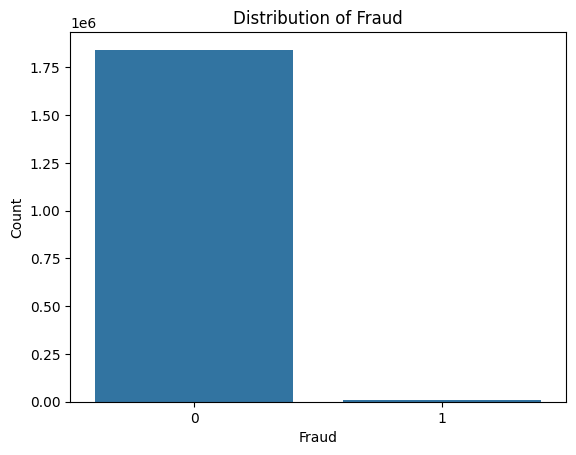

In [12]:
# plotting distribution of fraud 
fraud_counts=data['is_fraud'].value_counts()
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title('Distribution of Fraud')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()

we can see this data is highly unbalnced 

In [13]:
import plotly.express as px

In [16]:
# ltts check Data imbalance to get more clear picture 
labels=["Genuine","Fraud"]

fraud_or_not = data["is_fraud"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=data['is_fraud'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Genuine transactions")
fig.show()

# Data preprossing 
1. Deleting Duplicated data

In [18]:


#checking duplicated data 

duplicates = data[data.duplicated()]

print(f"Number of duplicate rows: {len(duplicates)}")
print("Duplicate rows:\n", duplicates)



Number of duplicate rows: 0
Duplicate rows:
 Empty DataFrame
Columns: [Unnamed: 0, trans_date_trans_time, cc_num, merchant, category, amt, first, last, gender, street, city, state, zip, lat, long, city_pop, job, dob, trans_num, unix_time, merch_lat, merch_long, is_fraud]
Index: []

[0 rows x 23 columns]


we don't have duplate rows

In [19]:
#still lets run this code to delete duplicate data 
data.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")
print("*" * 100)

Duplicated values dropped succesfully
****************************************************************************************************


# Handling outliers 

In [23]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns


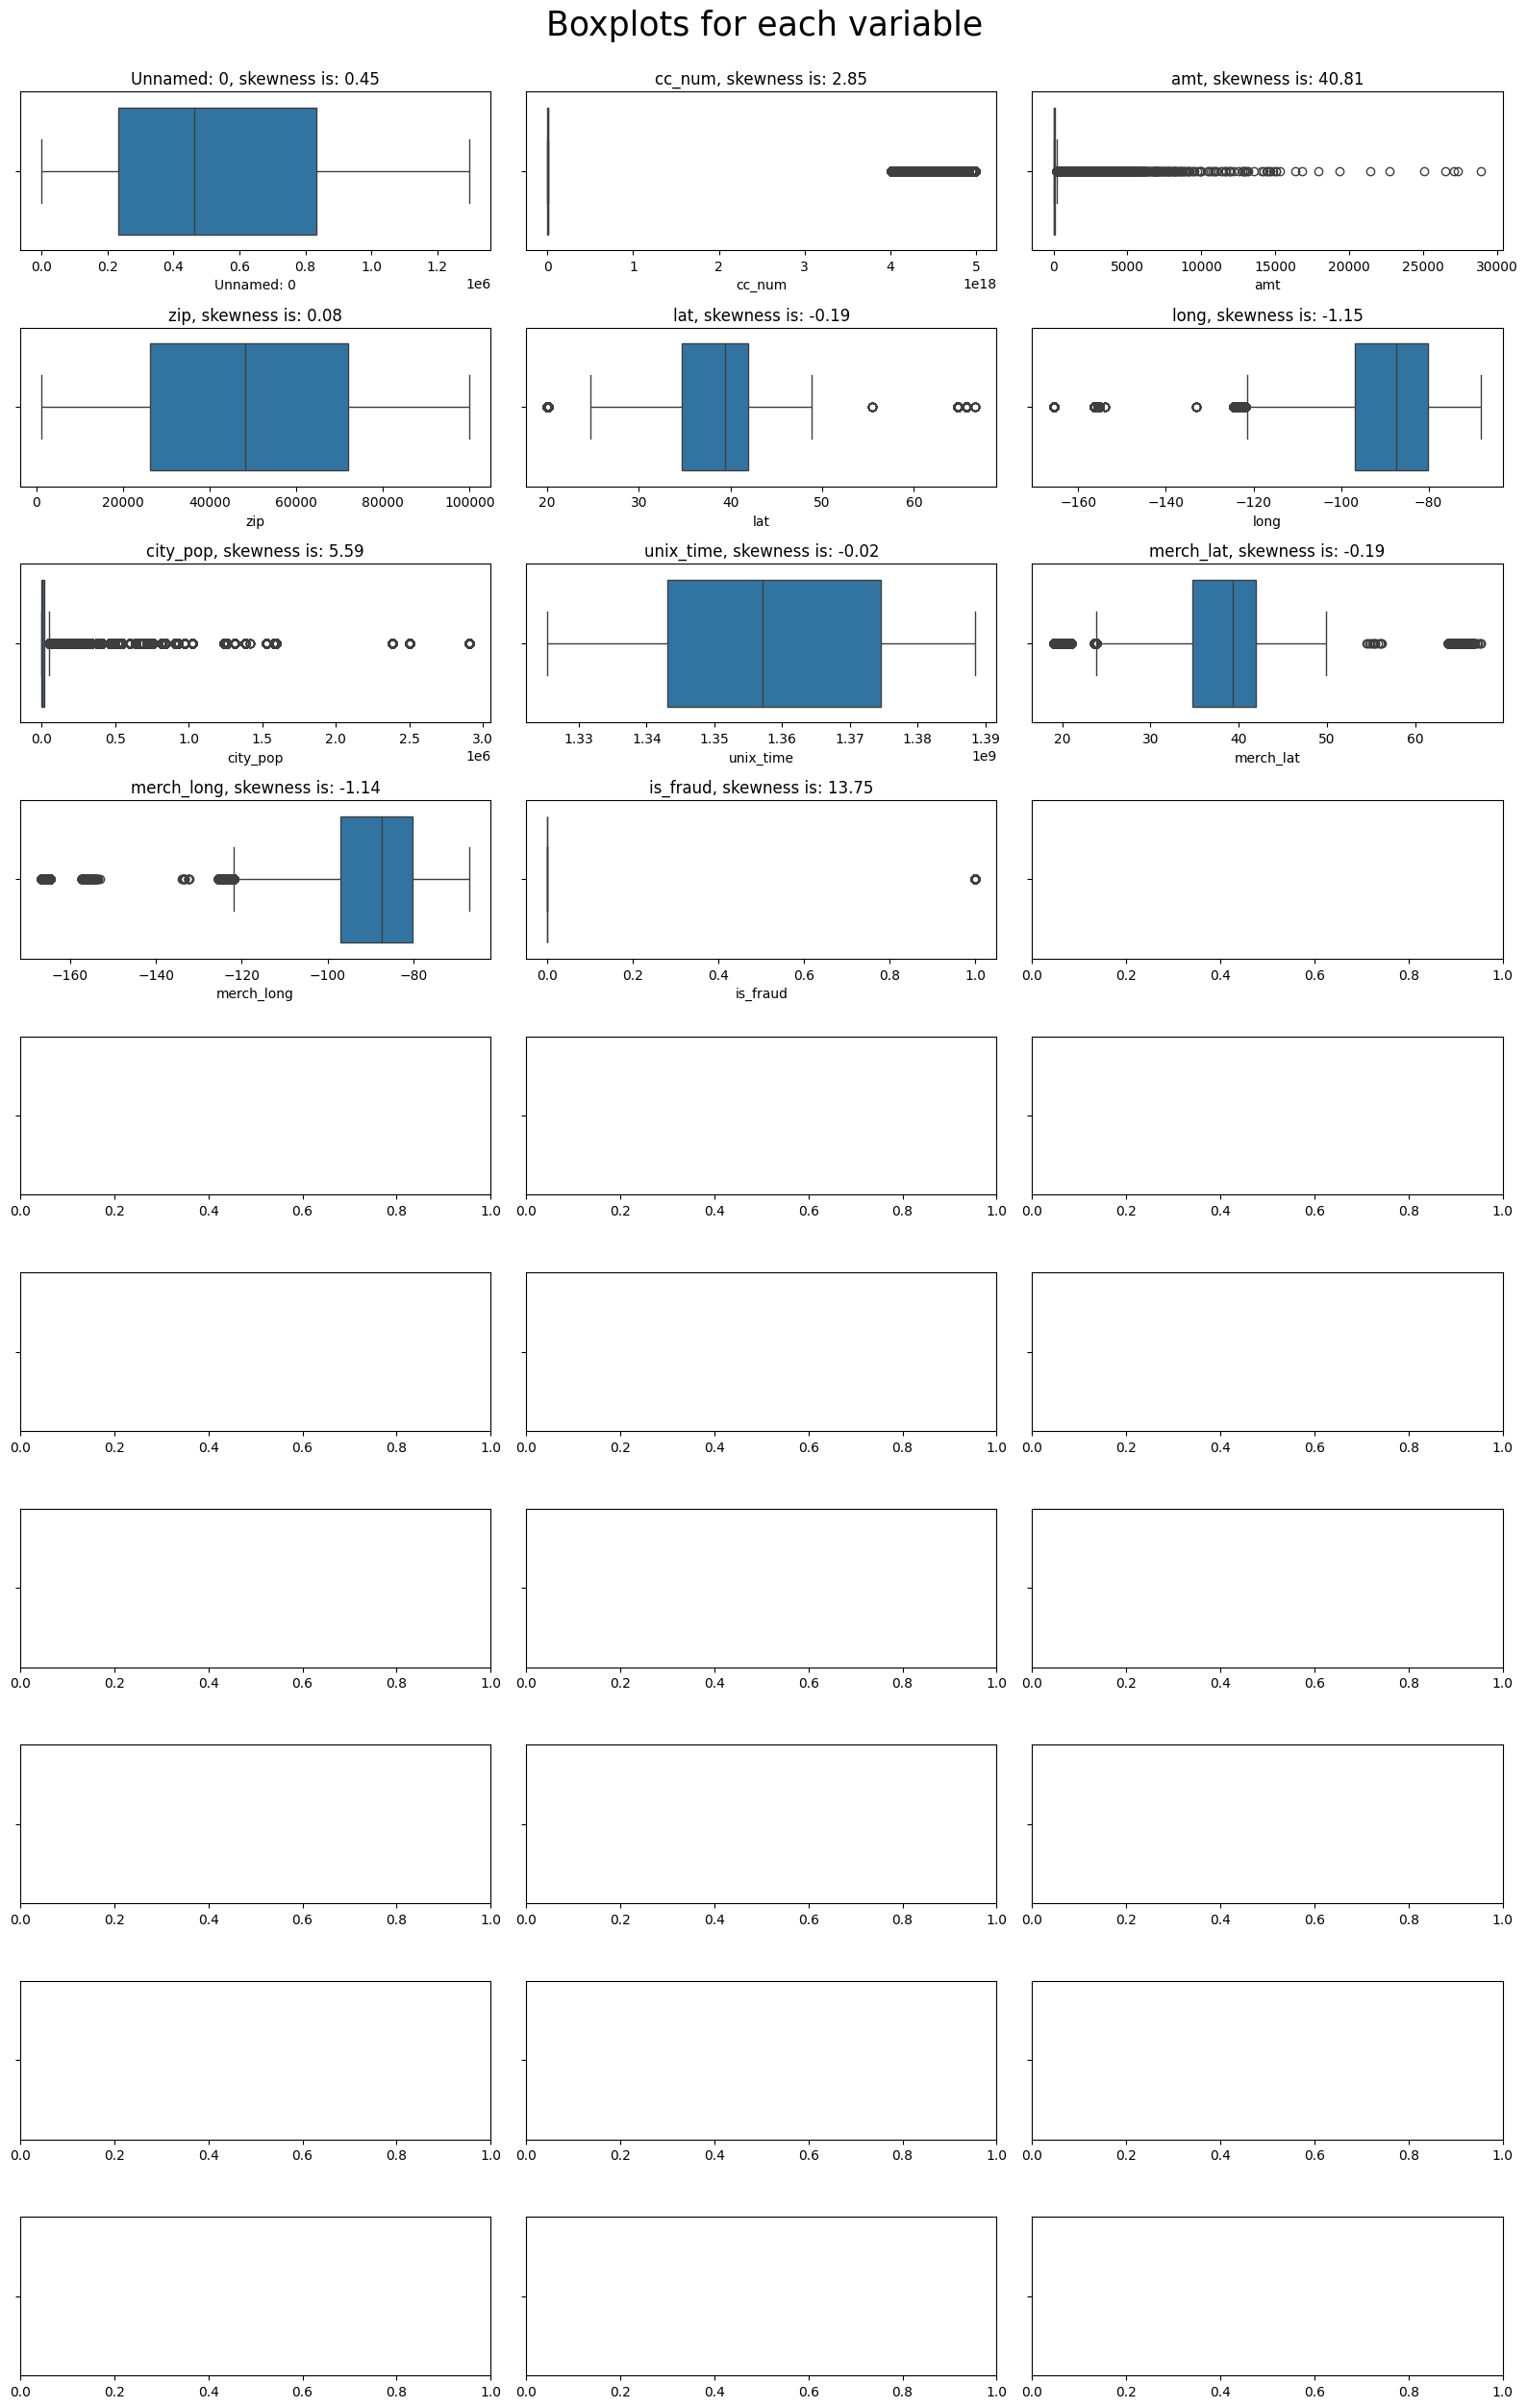

In [24]:
# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,25))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=data, columns_list=numeric_columns, rows=10, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

In [28]:
from collections import Counter

In [29]:
#defining function to find ouliers by IQR method 
def IQR_method (data,n,features):
    """
    This function takes a dataframe and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []
    
    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(data[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(data[column],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determining a list of indices of outliers
        outlier_list_column = data[(data[column] < Q1 - outlier_step) | (data[column] > Q3 + outlier_step )].index
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    out1 = data[data[column] < Q1 - outlier_step]
    out2 = data[data[column] > Q3 + outlier_step]
    
    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])
    
    return multiple_outliers

In [32]:
# detecting outliers
Outliers_IQR = IQR_method(data,1,numeric_columns)

# dropping outliers
data_out = data.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers is: 9651


C:\Users\sonam\AppData\Local\Temp\ipykernel_19848\2395094454.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




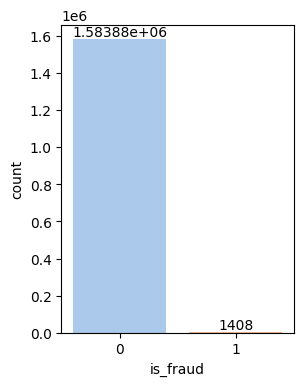

In [34]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='is_fraud',data=data_out,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

#data_out is data set after removing outliers 
removing outliers is important step 

In [35]:
fraud=data_out[data_out["is_fraud"]==1]
not_fraud=data_out[data_out["is_fraud"]==0]
print(fraud.shape[0])
print(not_fraud.shape[0])

1408
1583876


In [36]:
#balancing dataset 
not_fraud=not_fraud.sample(fraud.shape[0])
data_balanced=pd.concat([fraud,not_fraud])

C:\Users\sonam\AppData\Local\Temp\ipykernel_19848\459948289.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




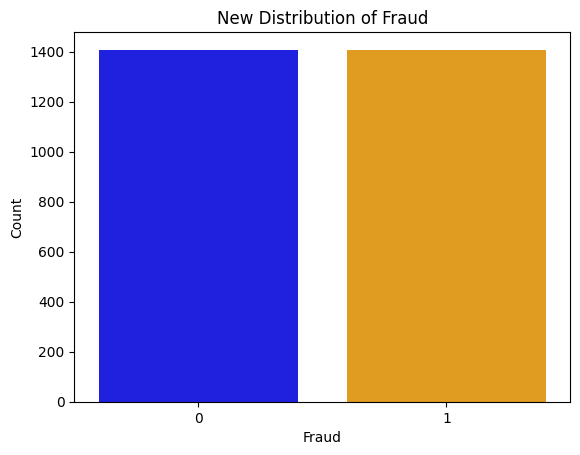

In [38]:
fraud_counts=data_balanced['is_fraud'].value_counts()
sns.barplot(x=fraud_counts.index,y=fraud_counts.values, palette=['blue', 'orange'])
plt.title('New Distribution of Fraud')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()


# Feature engineering 

In [40]:
#removing not worthy collumns 
unused_cols=['Unnamed: 0','first','last','unix_time','street','gender','job','dob','city','state','trans_num','merchant']
data_balanced.drop(columns=unused_cols,inplace=True)

In [41]:
data_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2816 entries, 3774 to 43034
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  2816 non-null   object 
 1   cc_num                 2816 non-null   int64  
 2   category               2816 non-null   object 
 3   amt                    2816 non-null   float64
 4   zip                    2816 non-null   int64  
 5   lat                    2816 non-null   float64
 6   long                   2816 non-null   float64
 7   city_pop               2816 non-null   int64  
 8   merch_lat              2816 non-null   float64
 9   merch_long             2816 non-null   float64
 10  is_fraud               2816 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 264.0+ KB


# Splitting the date-time 
This step is crucial in this data set as it becomes easier in feature engineering and manupulation.
1. Time-based patterns: Fraudulent transactions might show patterns at specific hours or days.
2. Seasonal trends: Transactions might vary by month or year.
3. Dimensionality reduction: Breaking the date-time into smaller units can make it easier for models to capture patterns.

In [42]:
data_balanced['trans_date_trans_time'] = pd.to_datetime(data_balanced['trans_date_trans_time'])

# Extracting date components
data_balanced['trans_day'] = data_balanced['trans_date_trans_time'].dt.day
data_balanced['trans_month'] = data_balanced['trans_date_trans_time'].dt.month
data_balanced['trans_year'] = data_balanced['trans_date_trans_time'].dt.year

# Extracting time components
data_balanced['trans_hour'] = data_balanced['trans_date_trans_time'].dt.hour
data_balanced['trans_minute'] = data_balanced['trans_date_trans_time'].dt.minute

# Dropping the original column
data_balanced.drop(columns=['trans_date_trans_time'], inplace=True)


# Encodding variables 
Encoding converts categorical or unique identifiers into numbers so they can be used as inputs for algorithms.

In [44]:
# Initialize LabelEncoder
encoder = LabelEncoder()

# Encode 'category' column
data_balanced['category'] = encoder.fit_transform(data_balanced['category'])

# Encode 'cc_num' column
data_balanced['cc_num'] = encoder.fit_transform(data_balanced['cc_num'])


In [45]:
data_balanced.head()

,cc_num,category,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,trans_day,trans_month,trans_year,trans_hour,trans_minute
3774,672,13,4.50,15665,40.3359,-79.6607,1472,39.492341,-78.859114,1,3,1,2019,22,58
9817,261,2,15.82,23106,37.7184,-77.1860,976,38.032519,-77.888310,1,8,1,2019,1,23
9869,539,2,8.79,71832,34.0442,-94.3386,11253,35.042148,-94.430423,1,8,1,2019,2,9
11658,405,2,18.86,57340,43.7588,-97.8712,355,42.903425,-97.212673,1,9,1,2019,1,59
12425,666,1,95.94,13755,42.0716,-75.0152,1228,41.834424,-75.351999,1,9,1,2019,22,35


In [48]:
#lets do now feature scalling 
scaler=StandardScaler()
data_balanced['amt']=scaler.fit_transform(data_balanced[['amt']])
data_balanced['zip']=scaler.fit_transform(data_balanced[['zip']])
data_balanced['city_pop']=scaler.fit_transform(data_balanced[['city_pop']])
data_balanced['cc_num']=encoder.fit_transform(data_balanced['cc_num'])

In [49]:
X=data_balanced.drop('is_fraud',axis=1)
y=data_balanced['is_fraud']

# Splitting the data 

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [55]:
RFC=RandomForestClassifier(random_state=0)
RFC.fit(X_train,y_train)
y_pred=RFC.predict(X_test)

# Model evaluation 

In [56]:
print('Accuracy:',accuracy_score(y_test, y_pred))
print('Precision:',precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))
print('Confusion matrix:',confusion_matrix(y_test, y_pred))

Accuracy: 0.9539007092198581
Precision: 0.9493243243243243
Recall: 0.9623287671232876
F1 score: 0.95578231292517
Confusion matrix: [[257  15]
 [ 11 281]]


Text(0.5, 1.0, 'Confusion Matrix')

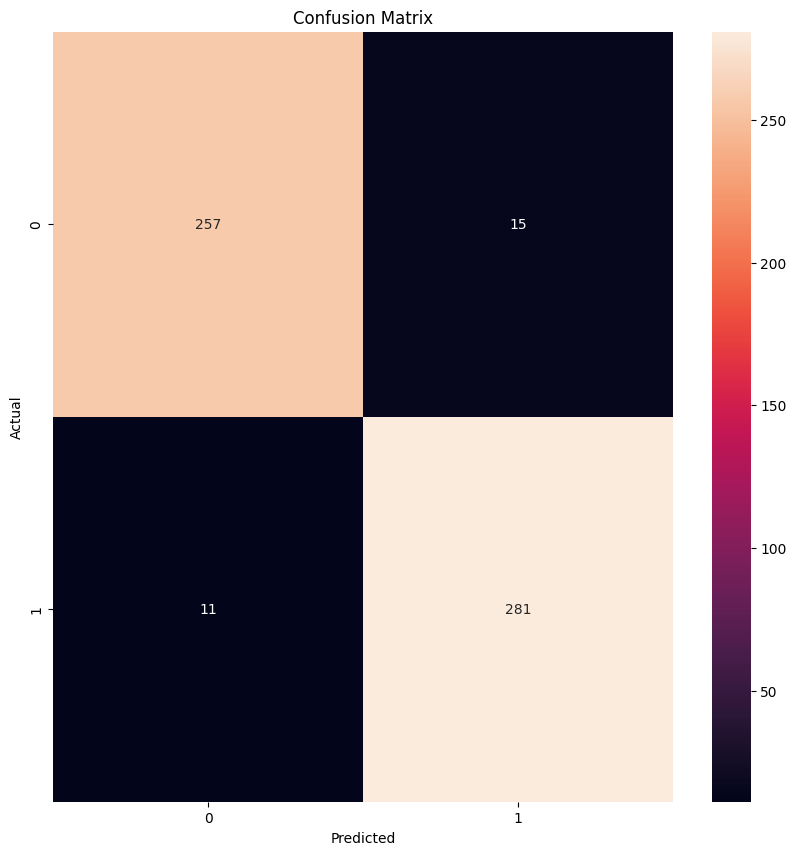

In [57]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')